<h3>Programa Conecta Recife</h3>
#Análise explanatória das zonas de WiFi da cidade do Recife 
http://dados.recife.pe.gov.br/dataset/conecta-recife


In [11]:
import pandas as pd

In [12]:
pf = pd.read_csv('ConectaRecife.csv', delimiter=';')

In [13]:
tabela_df = pd.DataFrame(pf, columns=["rpa","regiao","bairro","local", "qtdzonas","endereco","latitude","longitude"])
tabela_df.head()

,rpa,regiao,bairro,local,qtdzonas,endereco,latitude,longitude
0,1,CENTRO,Recife Antigo,Avenida Alfredo Lisboa,1,Avenida Alfredo Lisboa em frente a Justiça Mi...,-8064406.0,-34872095.0
1,1,CENTRO,Recife Antigo,Avenida Marquês de Olinda,1,Avenida Marquês de Olinda,-8063311.0,-34871705.0
2,1,CENTRO,Recife Antigo,Rua do Bom Jesus,1,Rua do Bom Jesus em frente ao N. 171,-806211.0,-3487141.0
3,1,CENTRO,Recife Antigo,Avenida Rio Branco,4,Avenida Rio Branco,-8062683.0,-34873032.0
4,1,CENTRO,Recife Antigo,Praça do Arsenal,1,Praça do Arsenal da Marinha s/n – Bairro do R...,-8061057.0,-34871294.0


In [14]:
#Verificando se há valores ausentes no dataset
valores_ausentes = pf.isnull().sum()
print(valores_ausentes)

rpa          0
regiao       0
bairro       0
local        0
qtdzonas     0
endereco     0
latitude     3
longitude    3
dtype: int64


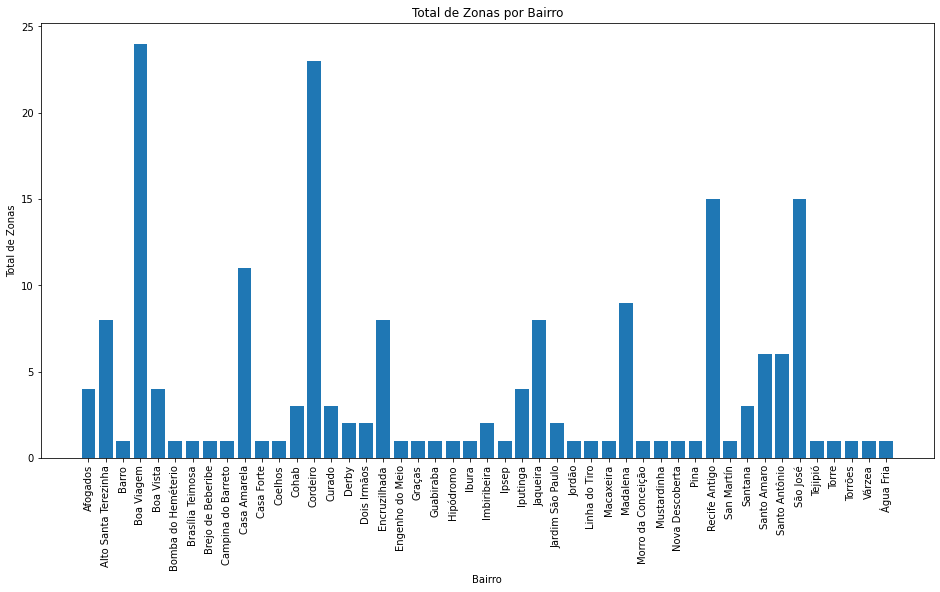

In [15]:
import matplotlib.pyplot as plt

# Agrupe os dados por 'bairro' e calcule a soma de 'qtdzona' para cada bairro
dados_agrupados = pf.groupby('bairro')['qtdzonas'].sum().reset_index()

# Crie o gráfico de barras
plt.figure(figsize=(16, 8))
plt.bar(dados_agrupados['bairro'], dados_agrupados['qtdzonas'])
plt.xlabel('Bairro')
plt.ylabel('Total de Zonas')
plt.title('Total de Zonas por Bairro')
plt.xticks(rotation=90)  # Para rotacionar os rótulos do eixo x, se necessário
plt.show()

In [16]:
bairros_com_mais_zonas = pf.groupby('bairro')['qtdzonas'].sum().nlargest(15)
print(bairros_com_mais_zonas)

bairro
Boa Viagem              24
Cordeiro                23
Recife Antigo           15
São José                15
Casa Amarela            11
Madalena                 9
Alto Santa Terezinha     8
Encruzilhada             8
Jaqueira                 8
Santo Amaro              6
Santo Antônio            6
Afogados                 4
Boa Vista                4
Iputinga                 4
Cohab                    3
Name: qtdzonas, dtype: int64


In [17]:
df_formatado = pd.DataFrame({'Bairro': bairros_com_mais_zonas.index, 'Qtd_Zonas': bairros_com_mais_zonas.values})

# Imprimir o novo DataFrame formatado
df_formatado.head(15)

,Bairro,Qtd_Zonas
0,Boa Viagem,24
1,Cordeiro,23
2,Recife Antigo,15
3,São José,15
4,Casa Amarela,11
5,Madalena,9
6,Alto Santa Terezinha,8
7,Encruzilhada,8
8,Jaqueira,8
9,Santo Amaro,6


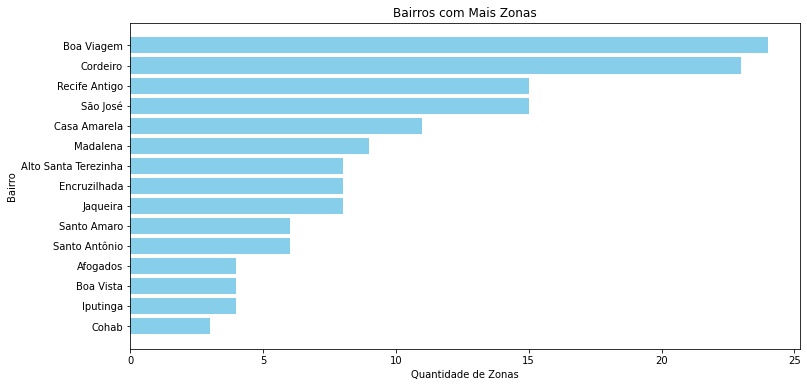

In [18]:
plt.figure(figsize=(12, 6))
plt.barh(df_formatado['Bairro'], df_formatado['Qtd_Zonas'], color='skyblue')
plt.xlabel('Quantidade de Zonas')
plt.ylabel('Bairro')
plt.title('Bairros com Mais Zonas')
plt.gca().invert_yaxis()  # Inverter a ordem para exibir o maior no topo

plt.show()

In [19]:
# Criar um dicionário de clusters onde as chaves são as regiões
clusters = {}

# Iterar pelas linhas do DataFrame e adicionar cada bairro à região correspondente
for index, row in pf.iterrows():
    regiao = row['regiao']
    bairro = row['bairro']
    
    # Se a região não estiver no dicionário de clusters, crie uma nova entrada com um conjunto vazio
    if regiao not in clusters:
        clusters[regiao] = set()
    
    # Adicione o bairro ao conjunto de bairros da região
    clusters[regiao].add(bairro)

# Exibir o dicionário de clusters formatado
for regiao, bairros in clusters.items():
    # Converter o conjunto de bairros de volta para uma lista para facilitar a exibição
    bairros_lista = list(bairros)
    
    print(f"Região: {regiao}")
    
    for bairro in bairros_lista:
        print(f"  - {bairro}")

Região: CENTRO
  - Recife Antigo
  - Santo Antônio
  - Boa Vista
  - Coelhos
  - Santo Amaro
  - São José
Região: NORTE
  - Hipódromo
  - Encruzilhada
  - Linha do Tiro
  - Campina do Barreto
  - Bomba do Heméterio
  - Alto Santa Terezinha
  - Água Fria
Região: NOROESTE
  - Jaqueira
  - Dois Irmãos
  - Graças
  - Derby
  - Guabiraba
  - Casa Amarela
  - Nova Descoberta
  - Morro da Conceição
  - Casa Forte
  - Santana
  - Brejo de Beberibe
  - Macaxeira
Região: OESTE 
  - Engenho do Meio
  - Madalena
  - Cordeiro
  - Várzea
  - Torrões
  - Torre
  - Iputinga
Região: SUDESTE
  - San Martín
  - Mustardinha
  - Barro
  - Jardim São Paulo
  - Afogados
  - Tejipió
  - Curado
Região: SUL
  - Ibura
  - Imbiribeira
  - Cohab
  - Pina
  - Jordão
  - Boa Viagem
  - Ipsep
  - Brasília Teimosa


In [20]:
print(pf.columns)

Index(['rpa', 'regiao', 'bairro', 'local', 'qtdzonas', 'endereco', 'latitude',
       'longitude'],
      dtype='object')


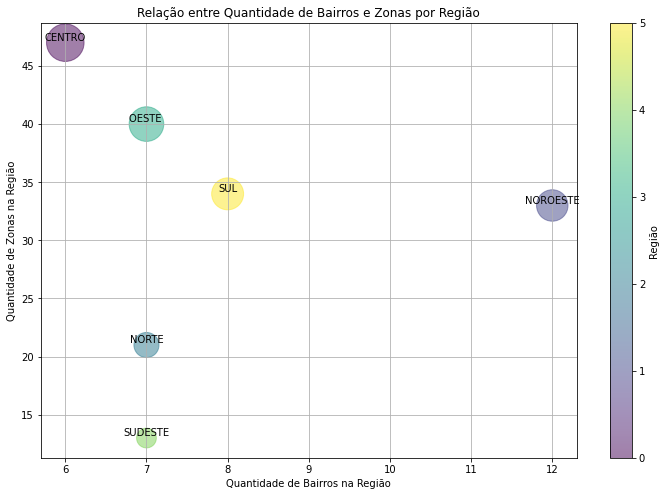

In [26]:
import seaborn as sns
import numpy as np

# Calcular o número de bairros por região
bairros_por_regiao = pf.groupby('regiao')['bairro'].nunique().reset_index()

# Calcular o total de zonas por região
regiao_totals = pf.groupby('regiao')['qtdzonas'].sum().reset_index()

# Crie um mapa de cores com base no número de regiões
n_cores = len(bairros_por_regiao['regiao'])
cores = sns.color_palette("viridis", n_cores)

# Crie o gráfico de dispersão com as cores mapeadas
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x, y, c=range(n_cores), s=sizes, cmap='viridis', alpha=0.5)
plt.xlabel('Quantidade de Bairros na Região')
plt.ylabel('Quantidade de Zonas na Região')
plt.title('Relação entre Quantidade de Bairros e Zonas por Região')
plt.colorbar(scatter, label='Região', ticks=range(n_cores))
plt.grid(True)

# Adicione os nomes das regiões em cima dos pontos
for i, row in bairros_por_regiao.iterrows():
    plt.annotate(row['regiao'], (x[i], y[i]), fontsize=10, ha='center', va='bottom')

# Exiba o gráfico
plt.show()